(12, 18)
Create weight file: bilinear_12x18_45x90_peri.nc
Remove file bilinear_12x18_45x90_peri.nc
CPU times: user 150 ms, sys: 0 ns, total: 150 ms
Wall time: 149 ms

(12, 18)
Create weight file: conservative_normed_12x18_45x90.nc
Remove file conservative_normed_12x18_45x90.nc
CPU times: user 134 ms, sys: 0 ns, total: 134 ms
Wall time: 132 ms

(12, 18)
Create weight file: nearest_s2d_12x18_45x90_peri.nc
Remove file nearest_s2d_12x18_45x90_peri.nc
CPU times: user 43.1 ms, sys: 0 ns, total: 43.1 ms
Wall time: 41.8 ms

(12, 18)
Create weight file: nearest_d2s_12x18_45x90_peri.nc
Remove file nearest_d2s_12x18_45x90_peri.nc
CPU times: user 12.1 ms, sys: 3.69 ms, total: 15.8 ms
Wall time: 14.5 ms

(12, 18)
Create weight file: patch_12x18_45x90_peri.nc
Remove file patch_12x18_45x90_peri.nc
CPU times: user 626 ms, sys: 3.74 ms, total: 629 ms
Wall time: 627 ms

Create weight file: conservative_normed_12x18_45x90.nc
Remove file conservative_normed_12x18_45x90.nc


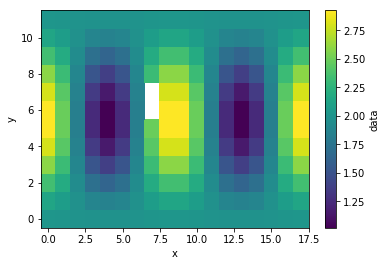

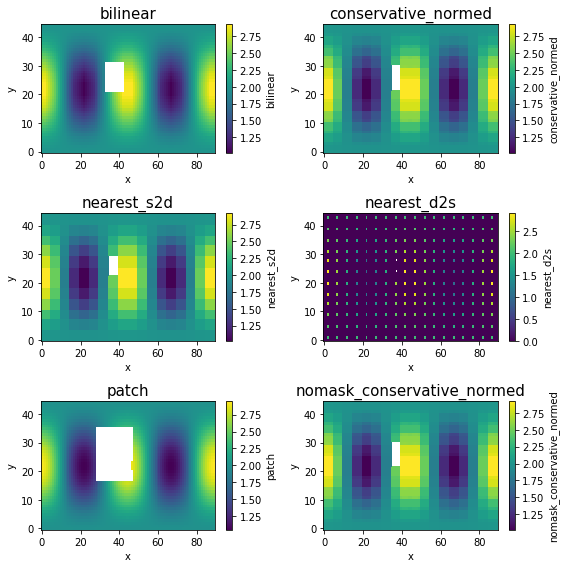

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xesmf as xe

method_list = ['bilinear', 'conservative_normed', 'nearest_s2d', 'nearest_d2s', 'patch']

ds_in = xe.util.grid_global(20, 15)  # input grid
ds_fine = xe.util.grid_global(4, 4)  # for down-sampling
ds_coarse = xe.util.grid_global(30, 20)  # for up-sampling

ds_in['data'] = xe.data.wave_smooth(ds_in['lon'], ds_in['lat'])
ds_in

# add Mask
in_mask = xe.data.wave_smooth(ds_in['lon'], ds_in['lat'])
in_mask[6:8,7] = np.NaN
ds_in['data'][6:8,7] = np.NaN
ds_in.coords['mask'] = in_mask

ds_in['data'].plot()


def regrid(ds_in, ds_out, dr_in, method):
    """Convenience function for one-time regridding"""
    regridder = xe.Regridder(ds_in, ds_out, method, periodic=True)
    dr_out = regridder(dr_in)
    regridder.clean_weight_file()
    return dr_out

for method in method_list:
    %time ds_fine[method] = regrid(ds_in, ds_fine, ds_in['data'], method)
    print('')
    
    
fig, axes = plt.subplots(3, 2, figsize=[8, 8])

for i, method in enumerate(method_list):
    ax = axes.flatten()[i]
    ds_fine[method].plot.pcolormesh(ax=ax)
    ax.set_title(method, fontsize=15)
    
# Drop mask and try
ds_fine['nomask_conservative_normed'] = regrid(ds_in.drop('mask'), ds_fine, ds_in['data'], 'conservative_normed')
ax = axes.flatten()[i+1]
ds_fine['nomask_conservative_normed'].plot.pcolormesh(ax=ax)
ax.set_title('nomask_conservative_normed', fontsize=15)

plt.tight_layout()